In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [128]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
print(train.shape)
print(test.shape)

(550068, 12)
(233599, 11)


In [4]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
train.groupby(['User_ID'])['Product_ID'].nunique()

User_ID
1000001     35
1000002     77
1000003     29
1000004     14
1000005    106
          ... 
1006036    514
1006037    122
1006038     12
1006039     74
1006040    180
Name: Product_ID, Length: 5891, dtype: int64

In [6]:
train.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [7]:
test.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [11]:
train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [12]:
def missing_val(df):
    missing_values=df.isnull().sum()
    missing_percentage=missing_values*100/len(df['User_ID'])
    missing_percentage=missing_percentage.sort_values(ascending=False)
    return missing_percentage

In [13]:
missing_val(train)

Product_Category_3            69.672659
Product_Category_2            31.566643
Purchase                       0.000000
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

In [14]:
missing_val(test)

Product_Category_3            69.590195
Product_Category_2            30.969311
Product_Category_1             0.000000
Marital_Status                 0.000000
Stay_In_Current_City_Years     0.000000
City_Category                  0.000000
Occupation                     0.000000
Age                            0.000000
Gender                         0.000000
Product_ID                     0.000000
User_ID                        0.000000
dtype: float64

# Visualization

Let's see the purchase amount by product categories

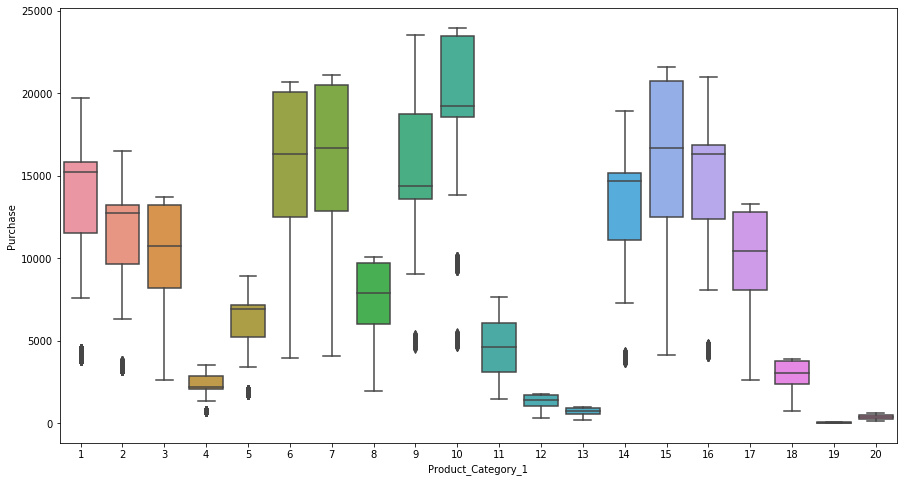

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_1'],train['Purchase'])


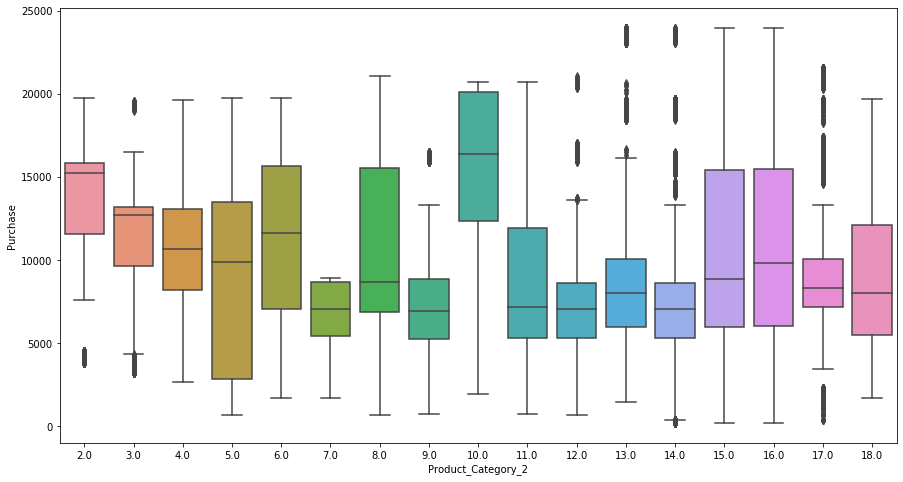

In [16]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_2'],train['Purchase'])

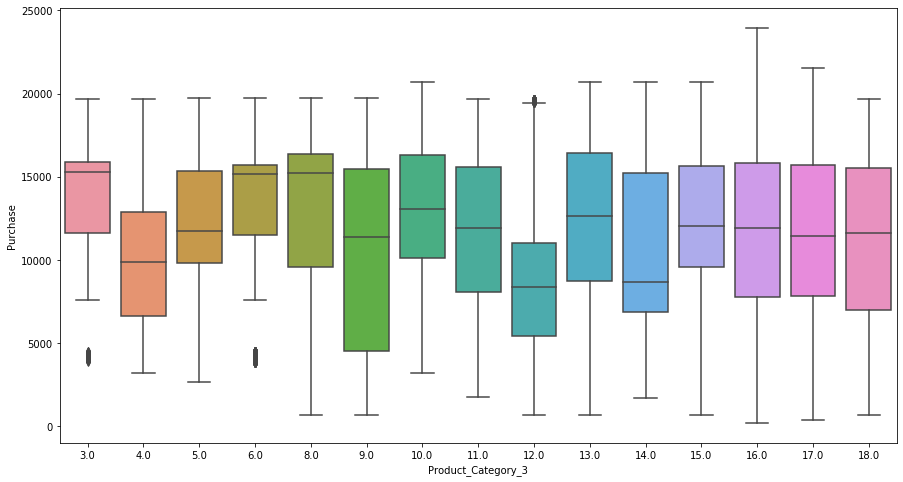

In [17]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Product_Category_3'],train['Purchase'])

### Most of the buyers are between the age of 18-45 

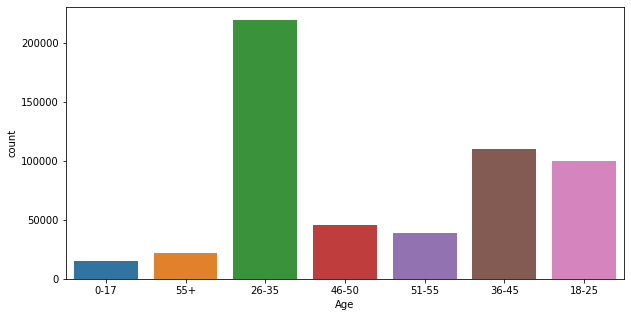

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(train['Age'])

### Age does not highly impact the purchasing power of user

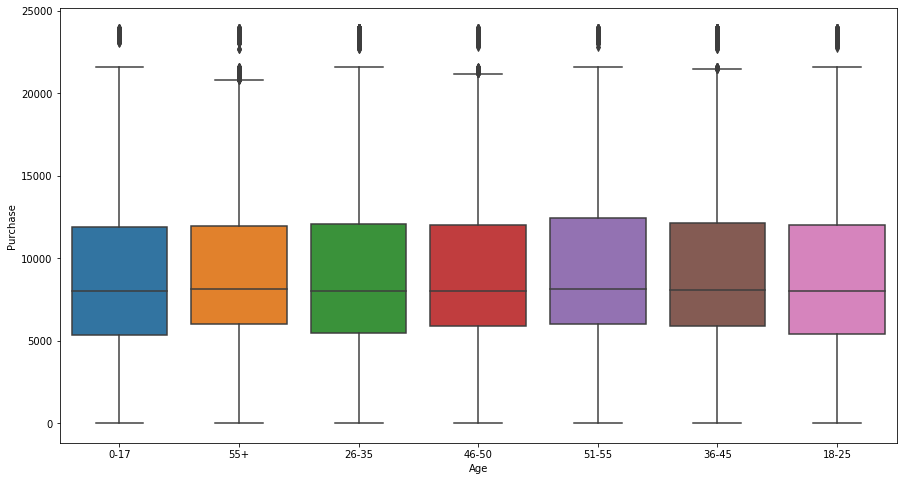

In [19]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Age'],train['Purchase'])

### Most of the buyers are from city category B

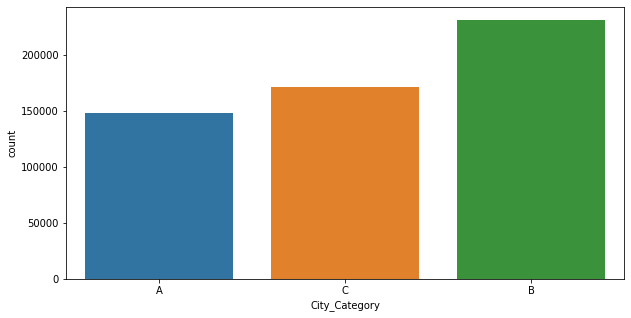

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(train['City_Category'])

### Purchasing power of users of category C city is highest followeed by B and A

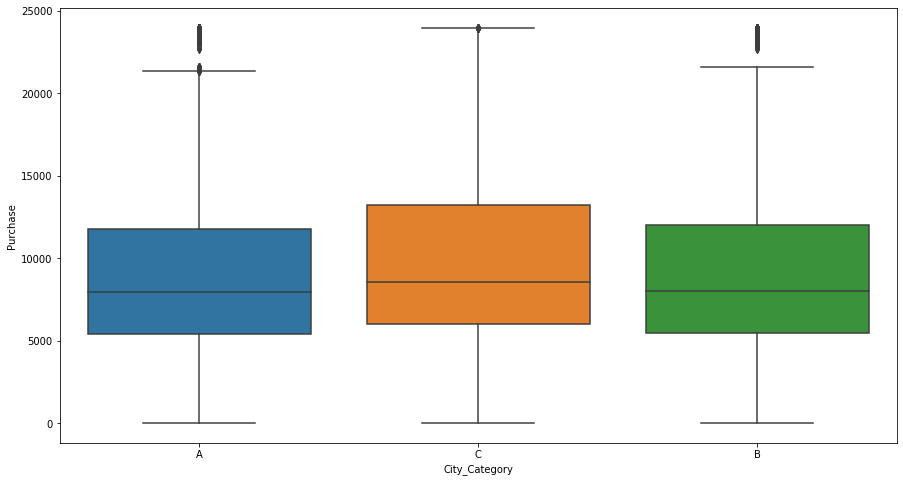

In [21]:
plt.figure(figsize=(15,8))
sns.boxplot(train['City_Category'],train['Purchase'])

### Most of the buyers are new comers in the city probably new comers want to buy home appliances, furnitures etc.

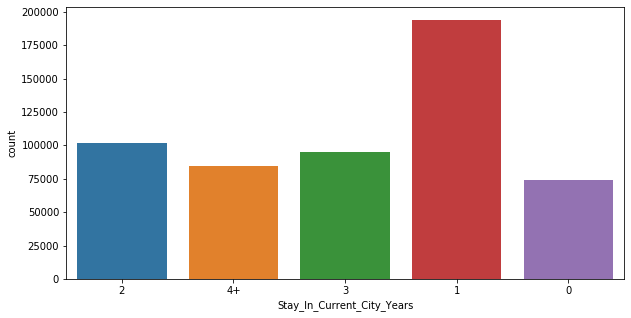

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(train['Stay_In_Current_City_Years'])

### Purchasing power is not much dependent on years of staying in cuurent city

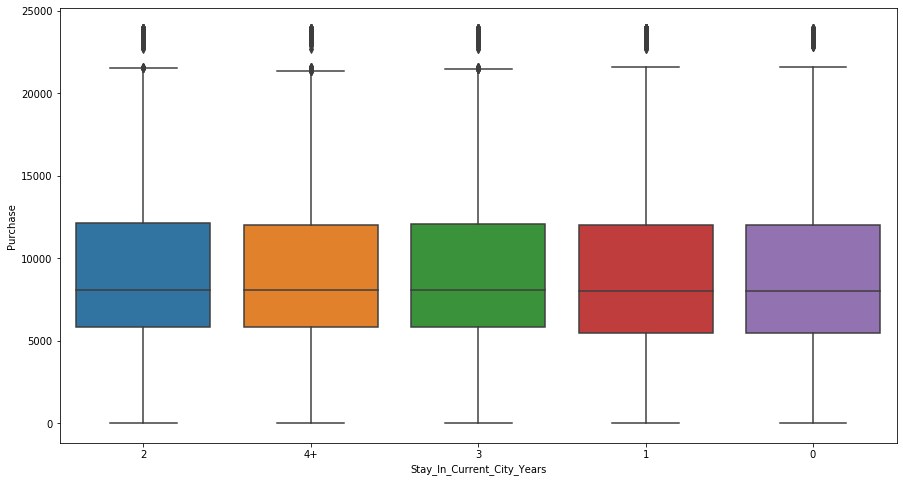

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(train['Stay_In_Current_City_Years'],train['Purchase'])

### Purchase variable seems to be normally distributed

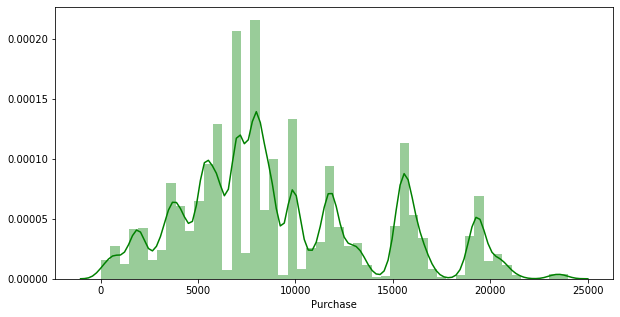

In [24]:
plt.figure(figsize=(10,5))
sns.distplot(train['Purchase'],color='green')

In [25]:
train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00065542       1
P00107842       1
P00364542       1
P00307242       1
P00350742       1
Name: Product_ID, Length: 3631, dtype: int64

### There are around 500 products that are purchased many times and then products purchased rarely

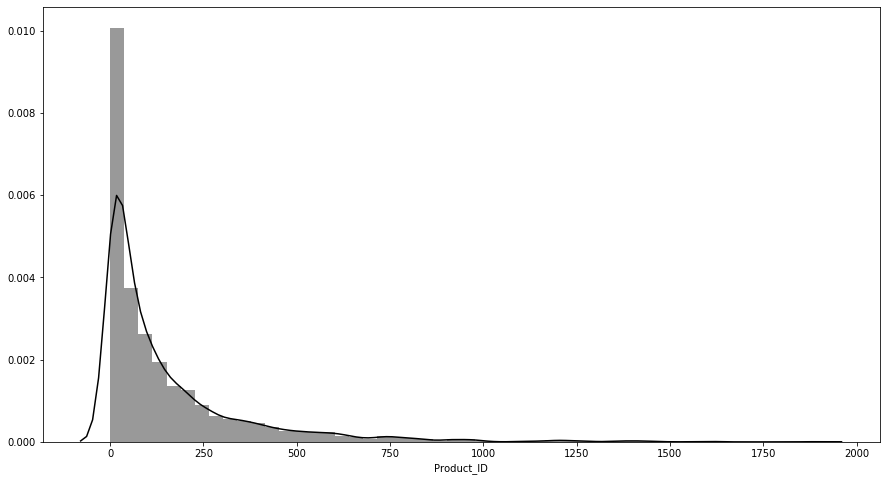

In [26]:
plt.figure(figsize=(15,8))
sns.distplot(train['Product_ID'].value_counts(),color='black')

### Label Encoding

In [129]:
def label_encoding(df):
    df['Age']=df['Age'].replace('0-17',17)
    df['Age']=df['Age'].replace('18-25',25)
    df['Age']=df['Age'].replace('26-35',35)
    df['Age']=df['Age'].replace('36-45',45)
    df['Age']=df['Age'].replace('46-50',50)
    df['Age']=df['Age'].replace('51-55',55)
    df['Age']=df['Age'].replace('55+',60)
    df['Gender']=df['Gender'].replace('F',0)
    df['Gender']=df['Gender'].replace('M',1)
    df['City_Category']=df['City_Category'].replace('A',0)
    df['City_Category']=df['City_Category'].replace('B',1)
    df['City_Category']=df['City_Category'].replace('C',2)
    df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+',4)
    return df

In [130]:
train=label_encoding(train)
test=label_encoding(test)

In [131]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype(int)

##### NaN values in product categories looks like representing that user did not purchase from that product category t's good idea to replace nan with zero's

In [132]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [31]:
test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [32]:
train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [107]:
dfd=train.copy()
dft=test.copy()


In [34]:
#train=dfd.copy()
#test=dft.copy

####  Let's create few new variables, average purchase by Product_ID and User_ID

In [133]:
avg_purchase_per_product=pd.DataFrame(train.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(train.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)

In [134]:
def create_var(data):
    product_count=pd.DataFrame(data['Product_ID'].value_counts())

    product_count.reset_index(inplace=True)
    product_count=product_count.rename(columns={'index':'Product_ID','Product_ID':'Product_count'})

    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['product_count']=data['Product_ID'].map(product_count.set_index('Product_ID')['Product_count'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])

    conditions = [
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] == 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] == 0),
    (data['Product_Category_1'] != 0) & (data['Product_Category_2'] != 0) & (data['Product_Category_3'] != 0)]
    choices = [1, 2, 3]
    data['Category_Count'] = np.select(conditions, choices, default=0)
    
    return data


In [135]:
train=create_var(train)
test=create_var(test)

In [136]:
train['Product_ID']=train['Product_ID'].str.slice(2).astype(int)
test['Product_ID']=test['Product_ID'].str.slice(2).astype(int)

In [39]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000001,69042,0,17,10,0,2,0,3,0.0,0.0,8370,11870.863436,227,9545.514286,1
1,1000001,248942,0,17,10,0,2,0,1,6.0,14.0,15200,16304.030981,581,9545.514286,3
2,1000001,87842,0,17,10,0,2,0,12,0.0,0.0,1422,1237.892157,102,9545.514286,1
3,1000001,85442,0,17,10,0,2,0,12,14.0,0.0,1057,1455.140762,341,9545.514286,2
4,1000002,285442,1,60,16,2,4,0,8,0.0,0.0,7969,7692.763547,203,10525.610390,1


In [40]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000004,128942,1,50,7,1,2,1,1,11.0,0.0,15781.118590,397,14747.714286,2
1,1000009,113442,1,35,17,2,0,0,3,5.0,0.0,11746.665354,117,10243.086207,2
2,1000010,288442,0,45,1,1,4,1,5,14.0,0.0,5731.338028,75,9728.744395,2
3,1000010,145342,0,45,1,1,4,1,4,9.0,0.0,1943.266667,8,9728.744395,2
4,1000011,53842,0,35,1,2,1,0,4,5.0,12.0,2585.590829,214,7957.471429,3


In [41]:
test.isnull().sum()

User_ID                        0
Product_ID                     0
Gender                         0
Age                            0
Occupation                     0
City_Category                  0
Stay_In_Current_City_Years     0
Marital_Status                 0
Product_Category_1             0
Product_Category_2             0
Product_Category_3             0
avg_purchase_per_product      61
product_count                  0
avg_purchase_per_user          0
Category_Count                 0
dtype: int64

In [137]:
test.fillna(0,inplace=True)

### avg_purchase_per_product,avg_purchase_per_user,Category_Count and Product_Category_3 are most important features

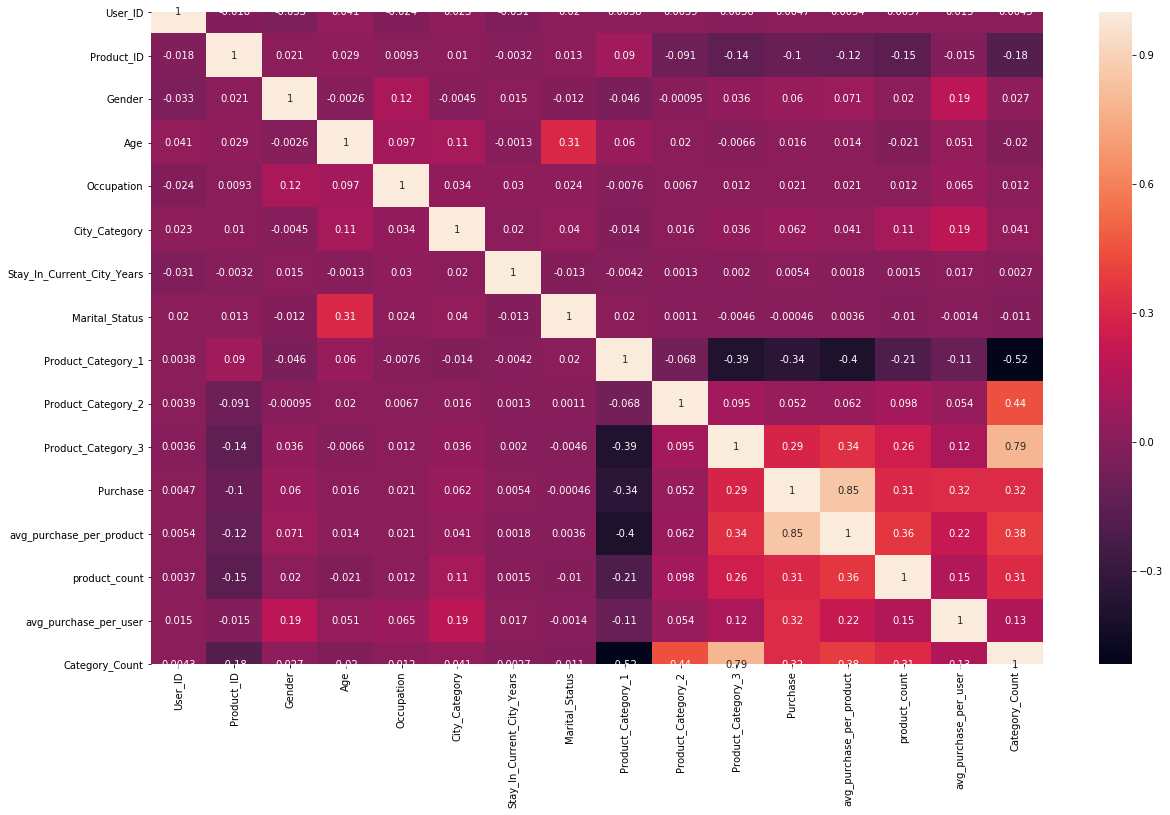

In [43]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

##### Let's try different combinations of fetaure with purchase to get more insight

In [44]:
gender_p=train.groupby(['Gender'])['Purchase'].mean()

In [45]:
gender_p

Gender
0    8734.565765
1    9437.526040
Name: Purchase, dtype: float64

Males are willing to spend more than females

In [46]:
age_p=train.groupby(['Age'])['Purchase'].mean()

In [47]:
age_p

Age
17    8933.464640
25    9169.663606
35    9252.690633
45    9331.350695
50    9208.625697
55    9534.808031
60    9336.280459
Name: Purchase, dtype: float64

teens (i.e 0-17 age) are spending a liitle bit less than other age categories but not large difference

In [48]:
occupation_p=train.groupby(['Occupation'])['Purchase'].mean()

In [49]:
occupation_p

Occupation
0     9124.428588
1     8953.193270
2     8952.481683
3     9178.593088
4     9213.980251
5     9333.149298
6     9256.535691
7     9425.728223
8     9532.592497
9     8637.743761
10    8959.355375
11    9213.845848
12    9796.640239
13    9306.351061
14    9500.702772
15    9778.891163
16    9394.464349
17    9821.478236
18    9169.655844
19    8710.627231
20    8836.494905
Name: Purchase, dtype: float64

In [50]:
print(occupation_p.mean())
print(occupation_p.std())

9242.711112995637
334.39389253783526


So occupation has a little bit impact on purchase

In [51]:
city_cat_p=train.groupby(['City_Category'])['Purchase'].mean()

In [52]:
city_cat_p

City_Category
0    8911.939216
1    9151.300563
2    9719.920993
Name: Purchase, dtype: float64

C category city users are spending higher followed by B and A

In [53]:
marital_p=train.groupby(['Marital_Status'])['Purchase'].mean()

In [54]:
marital_p

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

There is almost no differnce between amount spent by males and females

In [55]:
years_p=train.groupby(['Stay_In_Current_City_Years'])['Purchase'].mean()

In [56]:
years_p

Stay_In_Current_City_Years
0    9180.075123
1    9250.145923
2    9320.429810
3    9286.904119
4    9275.598872
Name: Purchase, dtype: float64

There is no significant differnce between amount spent by numbers of years of living in current city

## Model Development

In [113]:
X=train.drop('Purchase',axis=1)

In [114]:
y=train['Purchase']

In [115]:
print(X.shape)
print(y.shape)

(550068, 15)
(550068,)


In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

### Linear Regression

In [61]:
reg=linear_model.LinearRegression()

In [62]:
lm_model=reg.fit(X_train,y_train)

In [63]:
pred=lm_model.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test,pred))

2568.0004496106367

### Decision Tree

In [65]:
DT_reg=DecisionTreeRegressor()

In [66]:
DT_model=DT_reg.fit(X_train,y_train)

In [67]:
pred=DT_model.predict(X_test)

In [68]:
np.sqrt(mean_squared_error(y_test,pred))

3566.68749364999

### Random Forest

In [69]:
RF_reg=RandomForestRegressor()

In [70]:
RF_model=RF_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [71]:
np.sqrt(mean_squared_error(y_test,pred))

3566.68749364999

### XGBoost

In [72]:
from xgboost.sklearn import XGBRegressor

In [73]:
xgb=XGBRegressor(n_estimators=500,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)

In [74]:
XGB_model=xgb.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:20:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
pred=XGB_model.predict(X_test)

In [76]:
np.sqrt(mean_squared_error(y_test,pred))

2455.0935304850223

## Final Submission

In [116]:
purchase=XGB_model.predict(test)

In [117]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,avg_purchase_per_product,product_count,avg_purchase_per_user,Category_Count
0,1000004,128942,1,50,7,1,2,1,1,11.0,0.0,15781.118590,397,14747.714286,2
1,1000009,113442,1,35,17,2,0,0,3,5.0,0.0,11746.665354,117,10243.086207,2
2,1000010,288442,0,45,1,1,4,1,5,14.0,0.0,5731.338028,75,9728.744395,2
3,1000010,145342,0,45,1,1,4,1,4,9.0,0.0,1943.266667,8,9728.744395,2
4,1000011,53842,0,35,1,2,1,0,4,5.0,12.0,2585.590829,214,7957.471429,3


In [118]:
test=test[['User_ID','Product_ID']]

In [119]:
test['Purchase']=purchase

In [124]:
test=pd.read_csv('test.csv')

In [122]:
test['Product_ID']=testne['Product_ID']

In [123]:
test.to_csv('submission.csv',index=False)